# **Neural Network Model Construction**

This notebook is dedicated to constructing a neural network, iteratively adjusting its parameters to discover the optimal model.

However, the process of building the neural network is explained and reasoned in the *report.pdf*. Refer there for more information. This notebook will only contain the final chosen model for the data.

Import libraries and data:

In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [44]:
X = pd.read_csv('../csv/preprocessedData.csv')
y = pd.read_csv('../csv/target.csv')

In [45]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,-0.8,-0.428571,-1.000000,-1.0,-1.0,0.0,-0.589165,0.272727,0.333333,0.0,-1.0,-1.0,-1.0,-0.503333,-1.0
1,0.0,-1.0,-0.428571,-1.000000,1.0,-1.0,0.0,-0.760722,0.090909,-0.400000,0.0,-1.0,-1.0,-1.0,-0.616667,-1.0
2,0.0,-1.0,-0.714286,-0.882353,-1.0,-1.0,0.0,-0.986456,0.272727,0.400000,1.0,-1.0,-1.0,-1.0,-0.629630,-1.0


In [46]:
y.head(3)

,booking_status
0,1
1,0
2,1


## **Data split**: We are going to use 80% of the data for training, 10% for development and 10% for testing.

In [47]:
X_train = X[:int(0.8*len(X))]
X_dev = X[int(0.8*len(X)):int(0.9*len(X))]
X_test = X[int(0.9*len(X)):]

y_train = y[:int(0.8*len(y))]
y_dev = y[int(0.8*len(y)):int(0.9*len(y))]
y_test = y[int(0.9*len(y)):]

print("Training instances: ", X_train.shape[0], "(80 %)")
print("Development instances: ", X_dev.shape[0], "(10 %)")
print("Testing instances: ", X_test.shape[0], "(10 %)")

Training instances:  29016 (80 %)
Development instances:  3627 (10 %)
Testing instances:  3627 (10 %)


## With our data prepared, let's start the construction of our neural network.

Basic variables:

In [48]:
INPUTS = X_train.shape[1]
OUTPUTS = 1

Hyperparameters of our neural network (based on the trials explained in the *report.pdf*):

In [49]:
n_epochs = 200
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [1000, 1000, 1000, 1000, 1000]

Neural Network:

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hlayer:
    model.add(keras.layers.Dense(units=neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=42)))
    model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=OUTPUTS, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              17000     
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 dense_13 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_11 (Dropout)        (None, 1000)              0         
                                                                 
 dense_14 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_12 (Dropout)        (None, 1000)              0         
                                                                 
 dense_15 (Dense)            (None, 1000)             

The input layer has a size of 16, corresponding to each feature. Our network is ultimately comprised of 5 hidden layers, each containing 1000 neurons with 'relu' activation. Following each hidden layer is a dropout layer to mitigate overfitting, with a dropout rate of 0.5, which is relatively high but justified given the number of neurons in our network. The output layer consists of only 1 neuron (for binary classification) with 'sigmoid' activation.

Now we need to compile the model. We utilized the 'Adam' optimization function as it typically yields good results. The loss function employed is Binary Cross Entropy, suitable for classification problems like this one.

In [51]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=["binary_accuracy"])

#### Let's train the model:

In [52]:
import time
start = time.perf_counter()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(X_dev, y_dev))
tiempo = time.perf_counter() - start
print(tiempo)

Epoch 1/200
57/57 [==============================] - 3s 13ms/step - loss: 0.9072 - binary_accuracy: 0.6359 - val_loss: 0.6071 - val_binary_accuracy: 0.7521
Epoch 2/200
57/57 [==============================] - 0s 7ms/step - loss: 0.5415 - binary_accuracy: 0.7239 - val_loss: 0.4892 - val_binary_accuracy: 0.7728
Epoch 3/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4922 - binary_accuracy: 0.7602 - val_loss: 0.5145 - val_binary_accuracy: 0.7750
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4714 - binary_accuracy: 0.7733 - val_loss: 0.4874 - val_binary_accuracy: 0.7805
Epoch 5/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4611 - binary_accuracy: 0.7767 - val_loss: 0.4863 - val_binary_accuracy: 0.7800
Epoch 6/200
57/57 [==============================] - 0s 7ms/step - loss: 0.4512 - binary_accuracy: 0.7843 - val_loss: 0.4769 - val_binary_accuracy: 0.7888
Epoch 7/200
57/57 [==============================] - 0s 7ms/step - lo

Plot of the training:

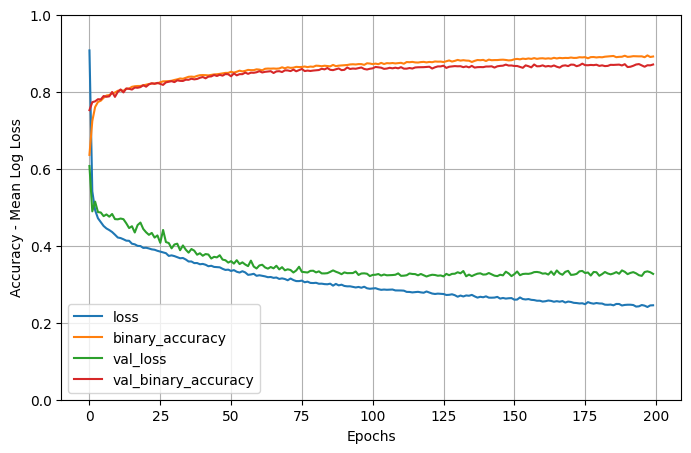

In [53]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)
plt.show()

We can observe that the model is not overfitting, as the validation loss does not increase.

Check results (Assuming 10 % of Bayesian Error):

In [54]:
table = {'Train Error': [(1 - results[-1:]['binary_accuracy'].values[0])*100],
         'Test Error': [(1 - results[-1:]['val_binary_accuracy'].values[0])*100],
         'Bias': [(1 - results[-1:]['binary_accuracy'].values[0])*100 - 10],
         'Variance': [(1 - results[-1:]['binary_accuracy'].values[0])*100 - (1 - results[-1:]['val_binary_accuracy'].values[0])*100]}

table = pd.DataFrame(data=table)
table

,Train Error,Test Error,Bias,Variance
0,10.852635,12.930799,0.852635,-2.078164


In [55]:
print("Training accuracy: ", results[-1:]['binary_accuracy'].values[0].round(4))
print("Development accuracy: ", results[-1:]['val_binary_accuracy'].values[0].round(4))

Training accuracy:  0.8915
Development accuracy:  0.8707


## Now that we have selected the best model, let's predict the test set.

In [56]:
predictions = model.predict(X_test)
predictions = np.round(predictions)

114/114 [==============================] - 0s 2ms/step


Check the coincidences:

In [62]:
coincidences = np.equal(y_test, predictions).sum()
accuracy = coincidences / len(y_test)
print("Test accuracy: ", accuracy.values[0].round(5))

Test accuracy:  0.87896


Some metrics:

In [69]:
conf = pd.DataFrame(confusion_matrix(predictions, y_test), columns=['True', 'False'])
conf.insert(0, 'Classes', ['True', 'False'])
conf

,Classes,True,False
0,True,929,181
1,False,258,2259


In [70]:
print(classification_report(y_test, predictions, target_names=['True', 'False']))

              precision    recall  f1-score   support

        True       0.84      0.78      0.81      1187
       False       0.90      0.93      0.91      2440

    accuracy                           0.88      3627
   macro avg       0.87      0.85      0.86      3627
weighted avg       0.88      0.88      0.88      3627




Therefore, we have achieved a very promising result on the test set (compared to the Bayesian Error of 10%). Further details on the results can be found in the report.pdf.